# Homework 7 - Let's have another look at the Titanic

The objective of this homework is to practice k-means clustering. To successfully complete this homework, you may use any resources available to you. 

Last week, we used supervised classification to understand what drives survivability. This week we explore whether the machine can figure it out on it's own.

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)).

1. Analyze the data using pandas.
    * Create a column `child` that specifies whether the person is a child (age <= 10).
    * Create a column `family_size` that specifies the size of the family of that person (Please note that there are two relevant columns for this step.
2. Develop clusters for the dataset.
    * Impute the `age` column with the **median** (Please note that this a very simplified step. Imputing is usually way more complex).
    * Drop all remaining NaN values.
    * Preprocess the `sex` column using LabelEncoder.
    * Preprocess the `child` column using LabelEncoder (not actually necessary but for systematic purposes).
    * Scale the data set to standardize the dataset using `sklearn.preprocessing.scale`
    * Run a KMeans cluster analysis. Pick an appropriate number of clusters.
    * Interpret the results.
3. Implement a search for the best number of clusters using the silhouette score from `sklearn.metrics`.
    * Set the parameters to 2,3,4,5,6 clusters.
    * Interpret the best results.
    * Try to find names for the clusters.
    
Hints:
* Explain what you are doing.
* Use references.

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm

In [120]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [121]:
%matplotlib inline

In [122]:
raw = pd.read_csv("https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
titanic3.csv")

In [123]:
tc = raw.copy()

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| **X**|
|`parch`| The number of parents or childen that are also traveling on the Titanic| **X**|
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

In [124]:
tc['Child'] = np.where(tc['age']>=10, 0, 1)

### Is the passenger a child?
Here, to Analyse the data better, a new column 'Child' is created and a binary classification is done based on the age of the person, if the person is older than 10, then a value '0' is set showing the person is not a child. If the person is younger than 10, a value of '1' is set.

Reference : https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/



In [125]:
tc['family_size'] = tc['sibsp'] + tc['parch'] + 1.0

### Family size of a Passenger
The dataset consists of values that could determine the family size of the passenger.
The Family size is calculated based on the number of sibilings or spouses - 'sibsp', parents or children travelling along with a passenger - 'parch'. 



### Impute the Dataset with Median Values

Many records in the dataset contain null values for 'age' of a passenger, so here these null values can be converted to the median of the dataset to ensure that the unsable data could be used.


In [126]:
tc['age'].median()

28.0

In [127]:
tc['age'].replace(np.nan,tc['age'].median(),inplace=True)

In [128]:
tc['age'].isnull().any()

False

In [140]:
tc_df = tc[['survived','pclass','sex','age','sibsp','parch','family_size']].copy()

A new Dataframe is created with required features to create a unsupervised model with the help of clustering techniques 

In [142]:
tc_df.dropna(inplace=True)

The 'sex' column is preprocessed using the label encoder to convert the gender values male and female to 1 and 0 respectively

In [144]:
import sklearn.preprocessing as pp
le = pp.LabelEncoder()
tc_df['sex'] = le.fit_transform(tc_df['sex'].astype(str))

In [145]:
X = tc_df.drop(['survived'], axis=1)

In [146]:
np.unique(X['sex'])

array([0, 1])

### Scaling the Dataset :

The dataset to be clustered is scaled to standardize the data across the dataset. 

In [147]:
X = pd.DataFrame(pp.scale(X,axis=1))

In [148]:
y = le.fit_transform(tc_df['survived'].astype(str))

### K-Means Clustering

Run a KMeans clustering analysis on the dataset X which contains the data with the feature set that needs to be Analyzed.  

Here, the ideal number of clusters is determined by the 'elbow' method. The dataset is used in the below algorithm to predict at which number of clusters, the graph bends to become an elbow.


https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

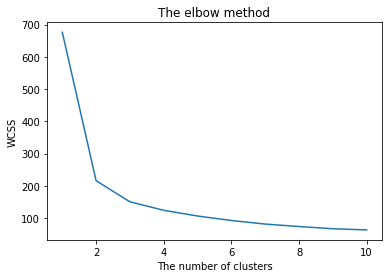

In [149]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0);
    kmeans.fit(X);
    wcss.append(kmeans.inertia_);
 

plt.plot(range(1,11), wcss);
plt.title('The elbow method');
plt.xlabel('The number of clusters');
plt.ylabel('WCSS');
plt.show();

In [150]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

In [151]:
from sklearn.metrics import silhouette_score

In [153]:
silhouette_score(X_scaled_New, y_kmeans)

0.88494444180350784

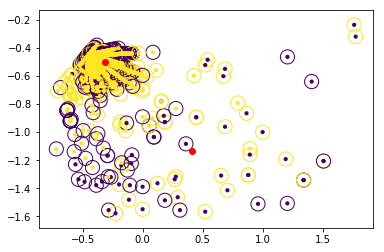

In [154]:
orig = plt.scatter(X_scaled_New.iloc[:,0], X_scaled_New.iloc[:,1], c=y, s=200)
orig.set_facecolor('None') # Set color to None
plt.scatter(X_scaled_New.iloc[:,0], X_scaled_New.iloc[:,1], s=10, c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='red');

###  K-Means Cluster - 2 :

The Scatter plot displays the clustering by the K-Means alogrithm on the dataset and its features. There are two clusters based on the value of n_clusters that was set above. The dots refers to the actual points of the dataset and the circles the prediction of the K-Means algorithm.

As it can be seen, due to the number of features, it is not exactly clear segregation of data based on the data points. This representation in 2-D brings forward this limitation. The silhouette score here is approximately 0.9, which shows that the values are almost properly clustered.


### A Pipeline for the data is created

In [168]:
from sklearn.pipeline import Pipeline

In [160]:
pipe = Pipeline([('scale', pp.StandardScaler()),('cluster', KMeans())])

In [161]:
pipe = Pipeline([('cluster', KMeans())])

In [162]:
cluster__n_clusters = [2,3,4,5,6]

In [163]:
score = pd.DataFrame(columns=['clusters', 'silhouette_score', 'labels'])
for n_cluster in cluster__n_clusters:
    pipe = pipe.set_params(cluster__n_clusters = n_cluster)
    labels = pipe.fit_predict(X_scaled_New)
    silhouette_avg = silhouette_score(X, labels)
    score = score.append({'clusters':n_cluster, 'silhouette_score': silhouette_avg, 'labels': labels}, ignore_index=True)

In [164]:
score.sort_values(by='silhouette_score')

,clusters,silhouette_score,labels
4,6,0.371890,"[4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
3,5,0.803481,"[0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4,0.811770,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,3,0.841570,"[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
0,2,0.884944,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


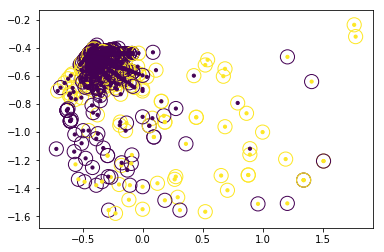

In [165]:
orig_reduced = plt.scatter(X_scaled_New.iloc[:,0], X_scaled_New.iloc[:, 1], c=y, s=200)
orig_reduced.set_facecolor('None') # Set color to None
plt.scatter(X_scaled_New.iloc[:,0], X_scaled_New.iloc[:,1], s=10, c=score.iloc[0,2])

### Silhouette Score :

The silhouette for the different number of clusters is shown above, it can clearly be seen that as the number of clusters increase, there is a drop in the silhouette Score, the general notion is that with the increase in the number of clusters, there could be better differentiation between the data points which might be close together. But, here, increasing the number of clusters actually decreases the score and makes the algorithm misclassify cretain data points which leads to decrease in the score.

And having more features can increase the chances of higher accuracy of the models. This might be true, but visualizing any model that has more than 3 or 4 features is very difficult as we mainly use 2-D or 3-D representations to view the data.

In [173]:
np.unique(y_kmeans)

array([0, 1], dtype=int32)

### Names of the Clusters :

Based on the above Values, it can be seen that the clusters are being based on labels which are either 0 or 1, this would probably be 'Survived' or 'Not Survived' because the end result is if the passenger had survived or not.

Note - This is for only K-Means cluster with n_cluster = 2, it has only 2 clusters.

### Unsupervised Learning :
Unsupervised Learning can be used to train a model based on data that doesn't have a specific target column, this makes it very useful for applications such as Voice Analysis, image recognition etc. Clustering has many different algorithms based on which the data points are segregated and grouped together. It is a difficult task to train a proper model because of the fact that the 'target' column is not know.